# ***GDP가 출산율과 출생률에 미치는 영향***

# 라이브러리 불러오기

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import mpld3
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터 전처리

## 데이터셋 불러오기

In [ ]:
df = pd.read_csv("./world-data-2023.csv")
df.head(5)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


## 데이터셋 열의 데이터형 확인하기

In [ ]:
df.dtypes

Country                                       object
Density\n(P/Km2)                              object
Abbreviation                                  object
Agricultural Land( %)                         object
Land Area(Km2)                                object
Armed Forces size                             object
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                 object
CPI                                           object
CPI Change (%)                                object
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                             object
Gasoline Price                                object
GDP                                           object
Gross primary education enrollment (%)        object
Gross tertiary education enrollment (%)       

## 처리해야 할 결측치 값 존재 확인하기
### .isnull() 함수로 열에 존재하는 null 값을 .sum() 함수로 개수 세기

In [ ]:
df.isnull().sum()

Country                                       0
Density\n(P/Km2)                              0
Abbreviation                                  7
Agricultural Land( %)                         7
Land Area(Km2)                                1
Armed Forces size                            24
Birth Rate                                    6
Calling Code                                  1
Capital/Major City                            3
Co2-Emissions                                 7
CPI                                          17
CPI Change (%)                               16
Currency-Code                                15
Fertility Rate                                7
Forested Area (%)                             7
Gasoline Price                               20
GDP                                           2
Gross primary education enrollment (%)        7
Gross tertiary education enrollment (%)      12
Infant mortality                              6
Largest city                            

## 결측치 정리하기
### .fillna(n) 함수를 이용해 NaN 값 n으로 변경해주기

In [ ]:
df = df.fillna(0)
df.isnull().sum()

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

## object 데이터 GDP를 int 형으로 바꿔 주기
### 1) 형 변환이 쉽게 GDP 열만 꺼내서 새로운 데이터프레임 만들기

In [ ]:
gdp_df = df['GDP']
gdp_df

0       $19,101,353,833 
1       $15,278,077,447 
2      $169,988,236,398 
3        $3,154,057,987 
4       $94,635,415,870 
             ...        
190    $482,359,318,768 
191    $261,921,244,843 
192     $26,914,402,224 
193     $23,064,722,446 
194     $21,440,758,800 
Name: GDP, Length: 195, dtype: object

### 2) .astype(x) 함수로 데이터 형태 x로 바꾸기
### 3) .str.replace(x, y) 함수로 해당 데이터 내에 있는 x 문자를 y 문자로 바꿔 주기
### 4) 형 변환 마친 데이터 열 원래의 데이터로 넣어 주기

In [ ]:
gdp_df = gdp_df.astype('str')
gdp_df = gdp_df.str.replace(',', '')
gdp_df = gdp_df.str.replace('$', '')
gdp_df = gdp_df.astype('int64')
gdp_df
df["GDP"] = gdp_df
df["GDP"]

<ipython-input-91-ed2d74d59e6a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gdp_df = gdp_df.str.replace('$', '')


0       19101353833
1       15278077447
2      169988236398
3        3154057987
4       94635415870
           ...     
190    482359318768
191    261921244843
192     26914402224
193     23064722446
194     21440758800
Name: GDP, Length: 195, dtype: int64

## 그래프에 사용될 값들만 꺼내 새로운 데이터프레임 만들기
### 1) 'Birth Rate', 'Fertility Rate', 'Unemployment rate', 'GDP'만 모은 데이터프레임 만들기
### 2) 'Unemployment rate' 열과 새로운 데이터프레임 데이터 형 변환하기
### 3) 사용할 새로운 데이터프레임 'new'에 'Country' 열 추가하기

In [ ]:
new_df = df[['Birth Rate', 'Fertility Rate', 'Unemployment rate', 'GDP']]
new = new_df.fillna(0)
new['Unemployment rate'] = new['Unemployment rate'].astype('str')
new['Unemployment rate'] = new['Unemployment rate'].str.replace('%', '')
new = new.astype(float)
new["GDP"] = df["GDP"].astype('int64')
new.loc[:,'Country'] = df['Country']
new

,Birth Rate,Fertility Rate,Unemployment rate,GDP,Country
0,32.49,4.47,11.12,19101353833,Afghanistan
1,11.78,1.62,12.33,15278077447,Albania
2,24.28,3.02,11.70,169988236398,Algeria
3,7.20,1.27,0.00,3154057987,Andorra
4,40.73,5.52,6.89,94635415870,Angola
...,...,...,...,...,...
190,17.88,2.27,8.80,482359318768,Venezuela
191,16.75,2.05,2.01,261921244843,Vietnam
192,30.45,3.79,12.91,26914402224,Yemen
193,36.19,4.63,11.43,23064722446,Zambia


# 그래프 그리기
## GDP 상위/하위 20위에 따른 출산율 비교하기 (Birth Rate: Highest GDP / Birth Rate: Lowest GDP)
### 1) .sort_values() 함수를 이용해 GDP 상위/하위 20위 데이터프레임 만들기

In [ ]:
gu_df = new.sort_values(by = 'GDP', ascending = False).head(20)
gd_df = new.drop(150, axis=0).sort_values(by = 'GDP', ascending = False).tail(20)   # 해당 열 Country 값이 깨져서 drop() 함수로 삭제 후 sort 진행

gd_df

,Birth Rate,Fertility Rate,Unemployment rate,GDP,Country
174,29.42,4.02,4.55,1673540300,East Timor
149,6.80,1.26,0.00,1637931034,San Marino
159,32.44,4.40,0.58,1425074226,Solomon Islands
70,35.13,4.48,2.47,1340389411,Guinea-Bissau
67,16.47,2.06,0.00,1228170370,Grenada
38,31.88,4.21,4.34,1185728677,Comoros
145,12.60,2.11,0.00,1050992593,Saint Kitts and Nevis
189,29.60,3.78,4.39,917058851,Vanuatu
148,24.38,3.88,8.36,850655017,Samoa
147,14.24,1.89,18.88,825385185,Saint Vincent and the Grenadines


### 2) .subplot() 함수를 이용해 x축이나 y축을 공유하는 그래프로 만들기
### 3) .xticks(rotation=90) 함수를 이용해 x축 라벨을 90도로 꺾어서 가독성 높이기

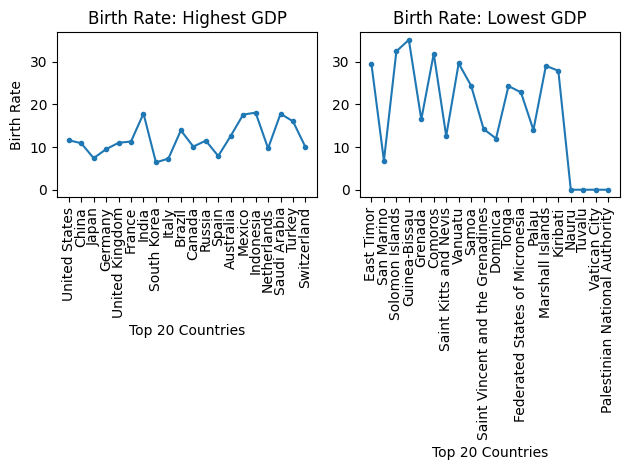

In [ ]:
ax1 = plt.subplot(1, 2, 1)
plt.plot(gu_df['Country'], gu_df['Birth Rate'], '.-')
plt.title('Birth Rate: Highest GDP')
plt.xlabel('Top 20 Countries')
plt.ylabel('Birth Rate')
plt.xticks(rotation=90)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(gd_df['Country'], gd_df['Birth Rate'], '.-')
plt.title('Birth Rate: Lowest GDP')
plt.xlabel('Top 20 Countries')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## GDP에 따른 출산율/출생률 비교하기 (Birth Rate/Fertility Rate vs GDP, Top 20 Countries (without US&China))
### 1) 상위 gdp 값 확인하기

In [ ]:
gu_df

,Birth Rate,Fertility Rate,Unemployment rate,GDP,Country
186,11.60,1.73,14.70,21427700000000,United States
36,10.90,1.69,4.32,19910000000000,China
85,7.40,1.42,2.29,5081769542380,Japan
64,9.50,1.56,3.04,3845630030824,Germany
185,11.00,1.68,3.85,2827113184696,United Kingdom
60,11.30,1.88,8.43,2715518274227,France
77,17.86,2.22,5.36,2611000000000,India
162,6.40,0.98,4.15,2029000000000,South Korea
83,7.30,1.29,9.89,2001244392042,Italy
23,13.92,1.73,12.08,1839758040766,Brazil


### 2) 그래프의 가시성을 위해 상위 값 중 극단적으로 높은 두 값(US&China) drop하기

In [ ]:
re_df = df.drop(index=186)
re_df = re_df.drop(index=36)

### 3) .scatter() 함수를 이용해 산점도로 그래프 그리기
### 4) x 축을 GDP로 공유하고, y 축에 출산율과 출생률 두기

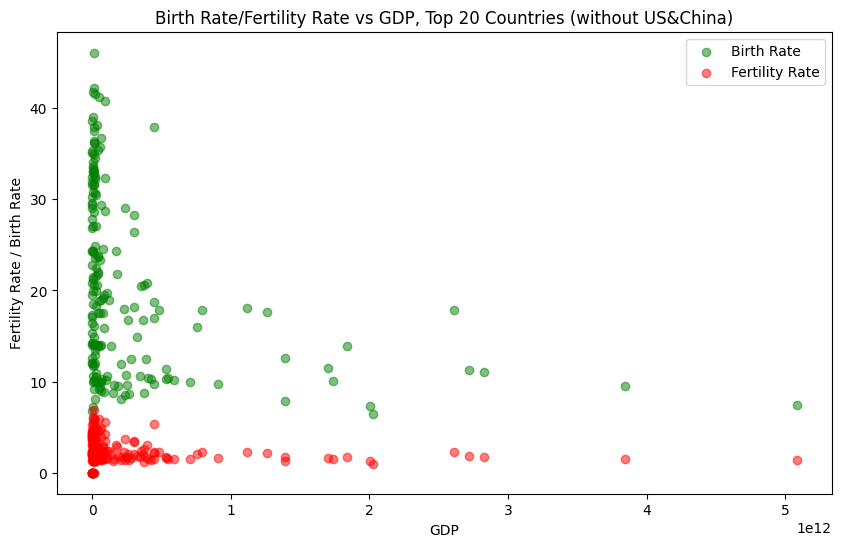

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(re_df['GDP'], re_df['Birth Rate'], color='green', alpha=0.5, label='Birth Rate')
plt.scatter(re_df['GDP'], re_df['Fertility Rate'], color='red', alpha=0.5, label='Fertility Rate')
plt.title('Birth Rate/Fertility Rate vs GDP, Top 20 Countries (without US&China)')
plt.xlabel('GDP')
plt.ylabel('Fertility Rate / Birth Rate')
plt.legend()
plt.show()

## 글로벌 지도 상의 산점도를 통해 국가별 출산율 비교하기 (Birth Rate of Countries)
### 1) geopandas와 shapely.geometry를 통해 파이썬에서 제공하는 지도 그래프 만들기
### 2) 지도 그래프 위로 출산율을 산점도로 나타내기

<ipython-input-82-36985db24b7c>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


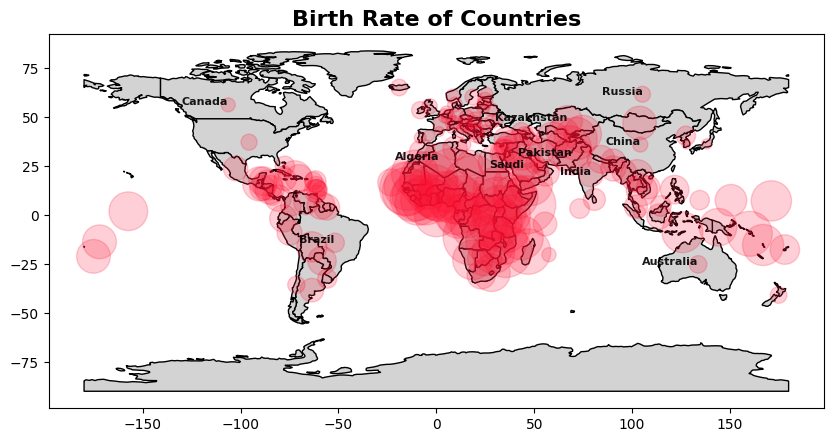

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]   # 데이터셋에 있는 위도/경도 열을 불러와 지도 그래프 위에 point(점) 찍기
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')          # 제공해주는 지도 데이터프레임 이용하기

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))

world.plot(ax=ax, color='lightgrey', edgecolor='black')

scatter = plt.scatter(x = df['Longitude'], y = df['Latitude'], s = df["Birth Rate"]**2, c='#fd1132',  alpha=0.2)    # 출산율 산점도로 표시하기(s(size) 값 제곱으로 해 크기에 확실한 차이 두기)

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Country']):
    if label in ['United States of America', 'Canada', 'Russia',
                 'China', 'Australia','Pakistan','India','Brazil', 'Kazakhstan','Algeria', 'Saudi Arabia']:         # 지도 그래프 위에 주요 국가 이름 표시하기
        ax.text(x, y, label.split(' ')[0], fontsize=8, ha='right', color='black', weight='bold', alpha=0.9)
    else:
        ax.text(x, y, '', fontsize=8, ha='right', color='darkslategrey', weight='bold', alpha=0.7)

plt.title('Birth Rate of Countries', fontsize=16, fontweight='bold')

plt.show()